In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser
import datetime

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import math

In [3]:
def read_and_clean(filen):
    
    df = pd.read_csv(str(filen))
    
    df = df[ ~(df['Year Month'].str.contains("Total"))]
    df['year'] = df['Year Month'].str.extract(r"(\d+) \w+")
    df['month'] = df['Year Month'].str.extract(r"\d+ (\w+)")
    
    df['date'] = pd.to_datetime(df['Year Month'], format='%Y %B')
    df.index = df['date']
    
    df = df[ ~(df['State'].str.contains("Total"))]
    df = df[ ~(df['Countym'].str.contains("Total"))]
    df = df[ ~(df['Industry'].str.contains("Total"))]
    df = df[ ~(df['Suspicious Activity'].str.contains("Total"))]
    df = df[ ~(df['Count'].str.contains("Total"))]
    
    df['Count'] = df['Count'].str.replace(',','')
    df['Count'] = df['Count'].astype(int)
    
    df['county'] = df['Countym'].str.extract(r"(.*), \w+")
    df['combined'] = df['county'] + ", " + df['State']

    
    return df

In [4]:
data = {}

In [5]:
data['2012'] = read_and_clean("DI-2012.csv")
data['2013'] = read_and_clean("DI-2013.csv")
data['2014'] = read_and_clean("DI-2014.csv")
data['2015'] = read_and_clean("DI-2015.csv")
data['2016'] = read_and_clean("DI-2016.csv")
data['2017'] = read_and_clean("DI-2017.csv")

/Users/rashidakamal/.virtualenvs/work/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
/Users/rashidakamal/.virtualenvs/work/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  import sys
/Users/rashidakamal/.virtualenvs/work/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [6]:
states_dict = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [7]:
states = list(states_dict.values())
states

['Alaska',
 'Alabama',
 'Arkansas',
 'American Samoa',
 'Arizona',
 'California',
 'Colorado',
 'Connecticut',
 'District of Columbia',
 'Delaware',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Iowa',
 'Idaho',
 'Illinois',
 'Indiana',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Massachusetts',
 'Maryland',
 'Maine',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Northern Mariana Islands',
 'Mississippi',
 'Montana',
 'National',
 'North Carolina',
 'North Dakota',
 'Nebraska',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'Nevada',
 'New York',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Virginia',
 'Virgin Islands',
 'Vermont',
 'Washington',
 'Wisconsin',
 'West Virginia',
 'Wyoming']

## Visualization function:

+ also doing a lot of the data re-shaping / analysis necessary to produce the desired visualiztion. 

# TO-DO:

+ Add line to show when major event occurred within the small multiples
+ Extend time-window to include data from 3 months prior to the event
+ Remove related states from the "national" / comparison line. 
+ Extend these analyses to financial instruments & other financial institutions

In [35]:
# take in a date in MM/DD/YYYY form
# take in list of states
# default focuses on 3 months out (which, for some reason, matplotlib looks out )
def suspiciousplots(start_date, data=data, states=states, months=6):
    
    year = start_date[-4:]
    month = start_date[:2]
    duration = months * 30 
    
    adjusted_start_date = (datetime.datetime.strptime(start_date, '%m/%d/%Y') - datetime.timedelta(days=120)).strftime('%m/%d/%Y')
    end_date = (datetime.datetime.strptime(start_date, '%m/%d/%Y') + datetime.timedelta(days=duration)).strftime('%m/%d/%Y')
    
    if int(year) < 2013:
        
        selection = pd.concat([ data[year], data[ str(int(year) + 1 ) ]])
        selection = selection[adjusted_start_date: end_date]
        
    else: 
        selection = pd.concat([ data[str(int(year) - 1 )], data[year], data[ str(int(year) + 1 ) ]])
        selection = selection[adjusted_start_date: end_date]
    
    suspicious_activities = selection['Suspicious Activity'].value_counts().index.tolist()
    
# plot your data:

    plt.figure(figsize=(25,75)).subplots_adjust(hspace=.8)
    
    plot_number = 1
    graphs_per_row = 3
    
    row_count = math.ceil(len(suspicious_activities) / graphs_per_row)
    
    for susact in suspicious_activities:
        
        # Some chart setup
        ax = plt.subplot(row_count, graphs_per_row, plot_number)
        ax.set_title(susact)
        ax.grid(linestyle='-', linewidth='0.5', color='white')
        plot_number = plot_number + 1
        
        # Slice by the particular suspicious activty you want
        susacts_selection = selection[selection['Suspicious Activity'] == susact]
        
        # National levels, by percent change (add for context)
        susacts_selection_minus = susacts_selection[~susacts_selection['State'].isin(states)]
        susacts_selection_ptchange = pd.DataFrame(susacts_selection_minus.resample('M')['Count'].sum()).reset_index()
        susacts_selection_ptchange['change'] = susacts_selection_ptchange['Count'].pct_change()
        susacts_selection_ptchange.index = susacts_selection_ptchange['date']
        
        # Local levels, particular to the specific disaster or major event.
        local_susacts_selection = susacts_selection[susacts_selection['State'].isin(states)]
        local_susacts_selection_ptchange = pd.DataFrame(local_susacts_selection.resample('M')['Count'].sum()).reset_index()
        local_susacts_selection_ptchange['change'] = local_susacts_selection_ptchange['Count'].pct_change()
        local_susacts_selection_ptchange.index = local_susacts_selection_ptchange['date']
        
        # Plot the two lines
        
        if not (susacts_selection_ptchange.empty):
            susacts_selection_ptchange['change'].plot(ax=ax, markeredgewidth=0, c='gray')
            plt.axvline(pd.to_datetime(start_date), color='k', linestyle='-')
        
        if not (local_susacts_selection_ptchange.empty):
            local_susacts_selection_ptchange['change'].plot(ax=ax, markeredgewidth=0, c='blue')

    plt.tight_layout()
    plt.show()
         
    return 

# EXAMPLE: 2012: Hurricane Sandy (Eastern US)

## 6 months out

/Users/rashidakamal/.virtualenvs/work/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=734776.0, right=734776.0
  'left=%s, right=%s') % (left, right))
/Users/rashidakamal/.virtualenvs/work/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=734988.0, right=734988.0
  'left=%s, right=%s') % (left, right))
/Users/rashidakamal/.virtualenvs/work/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=734958.0, right=734958.0
  'left=%s, right=%s') % (left, right))


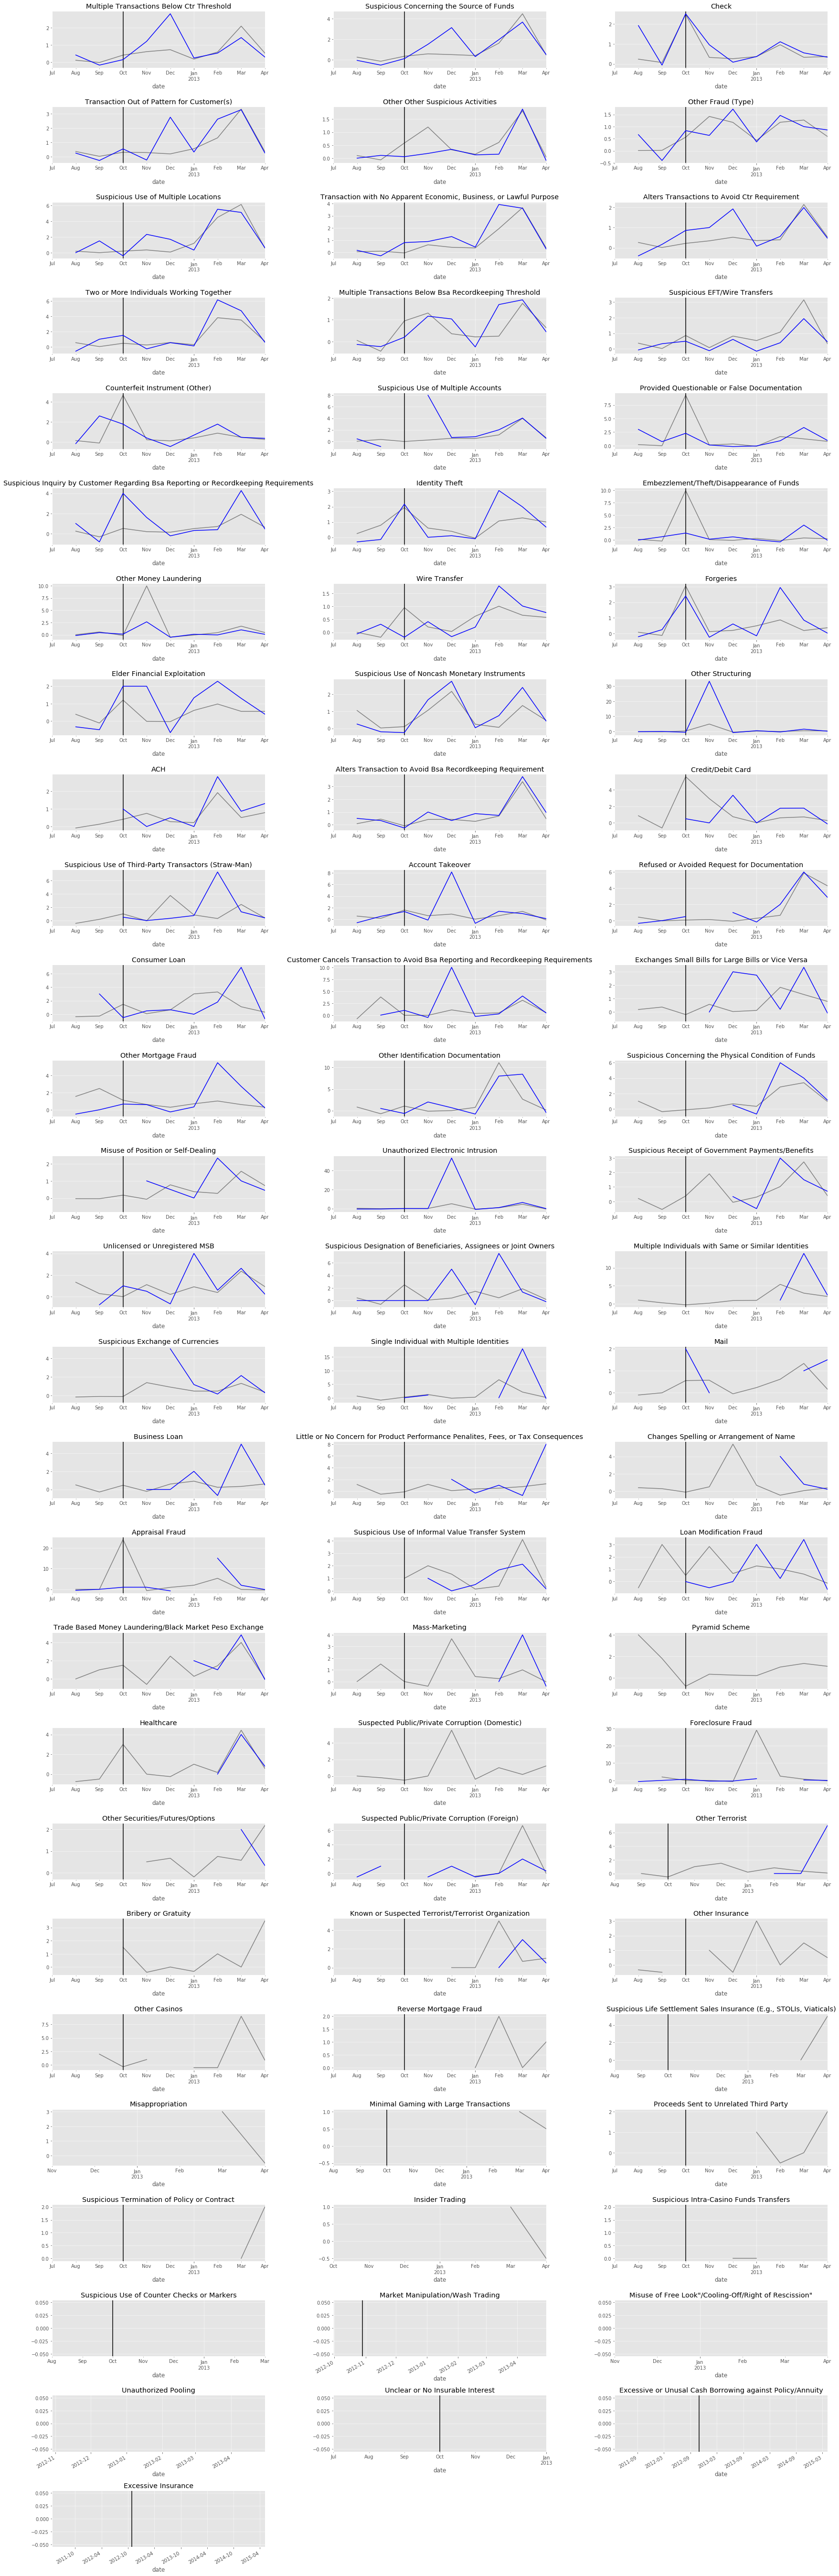

In [29]:
suspiciousplots('10/29/2012', states=['New York', 'New Jersey'])

## 12 months out

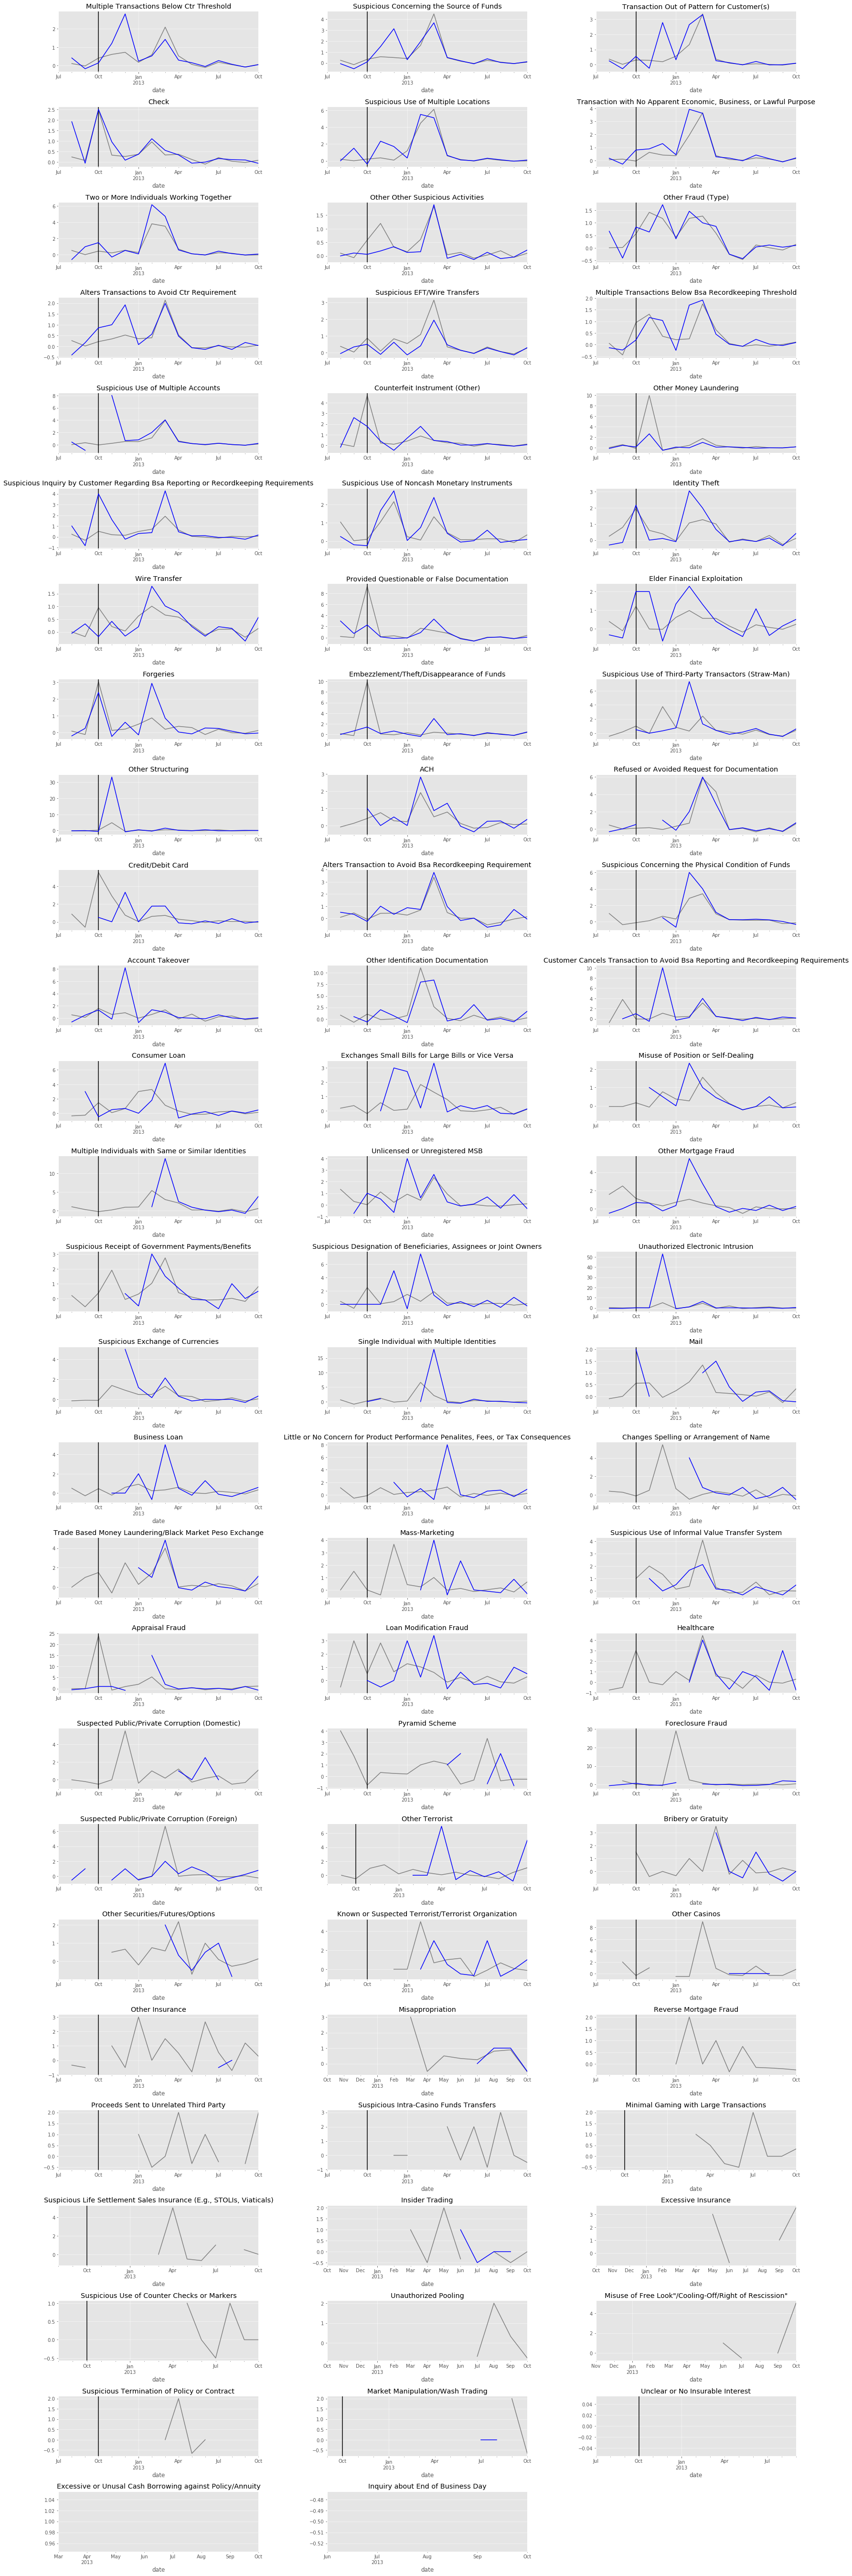

In [30]:
suspiciousplots('10/29/2012', states=['New York', 'New Jersey'], months=12)

# EXAMPLE: December 14, 2012: Sandy Hook Shooting (Newtown, CT)

## 6 months out

/Users/rashidakamal/.virtualenvs/work/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735049.0, right=735049.0
  'left=%s, right=%s') % (left, right))
/Users/rashidakamal/.virtualenvs/work/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=734958.0, right=734958.0
  'left=%s, right=%s') % (left, right))


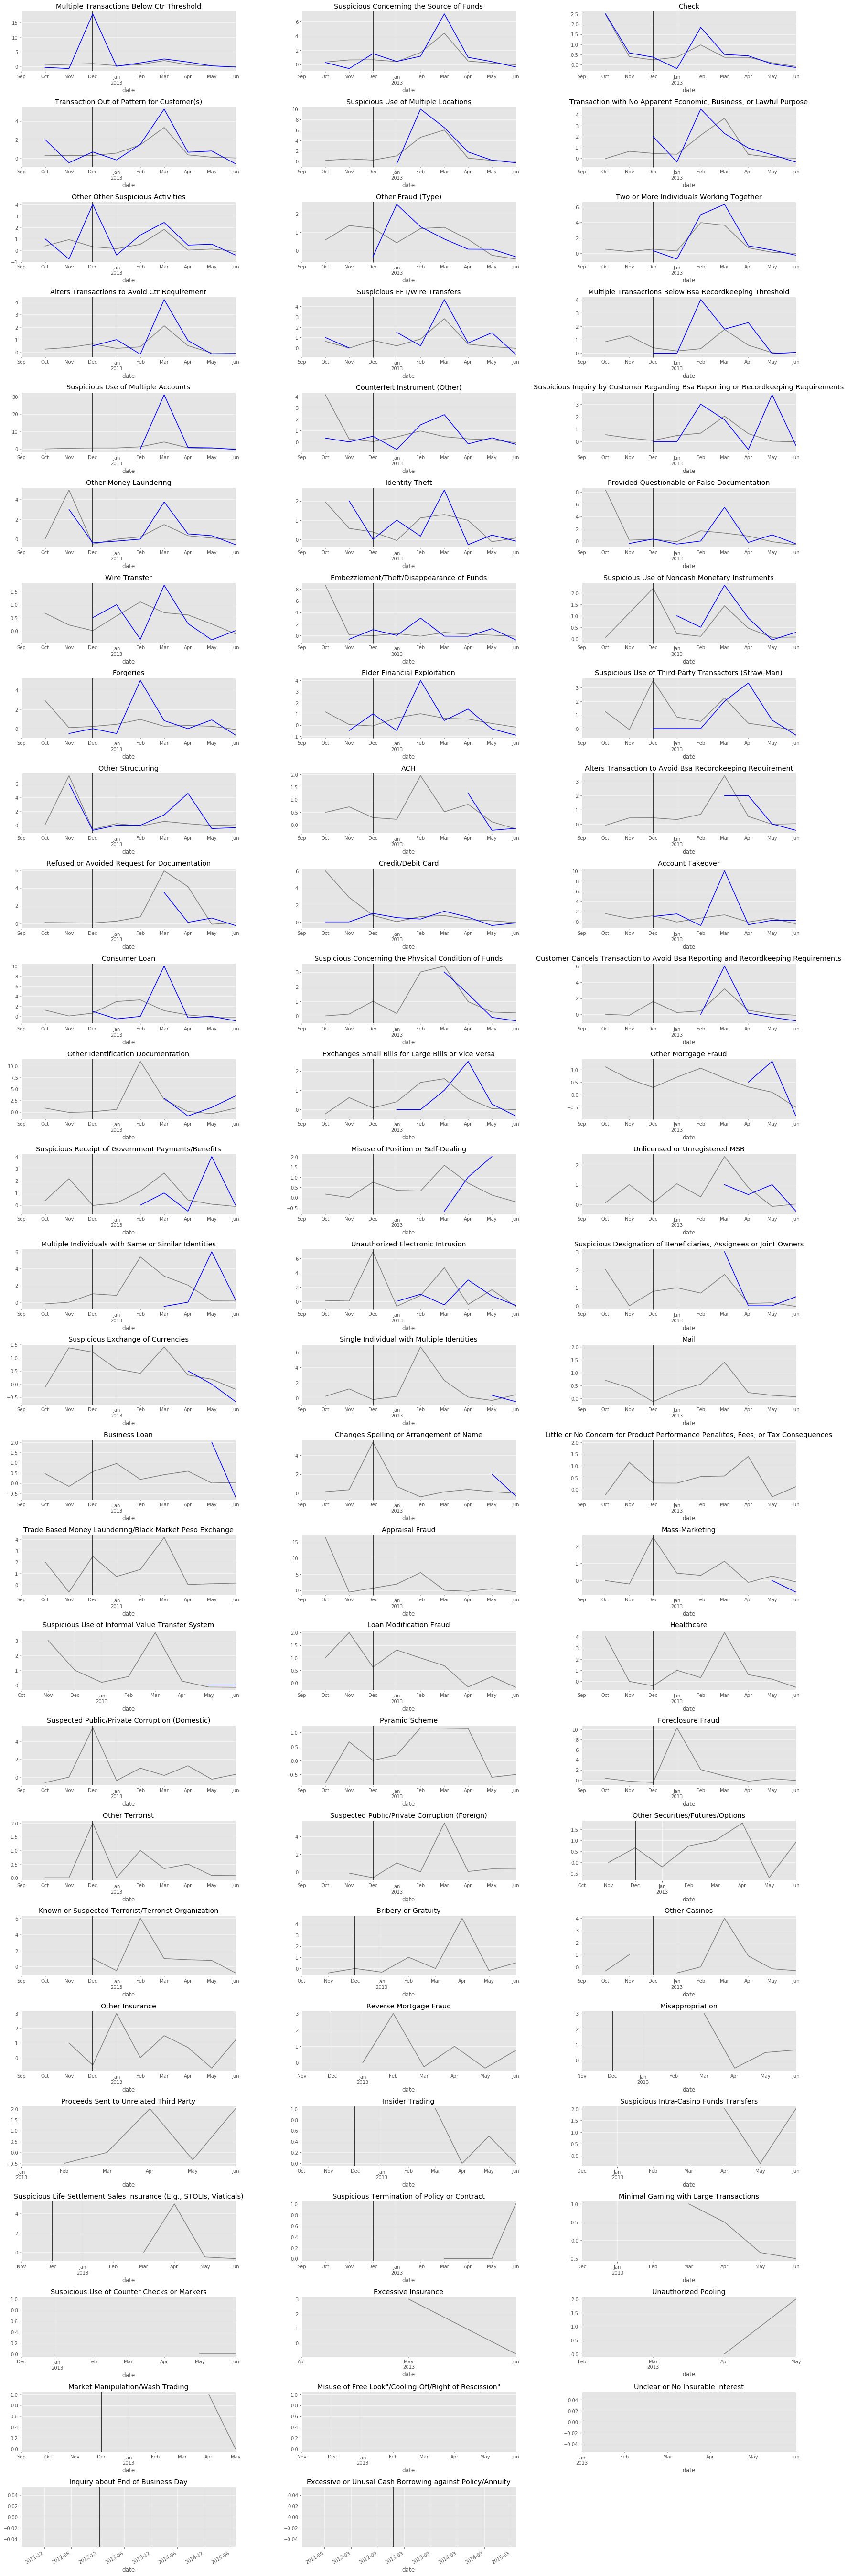

In [31]:
suspiciousplots('12/14/2012', states=['Connecticut'])

## 12 months out

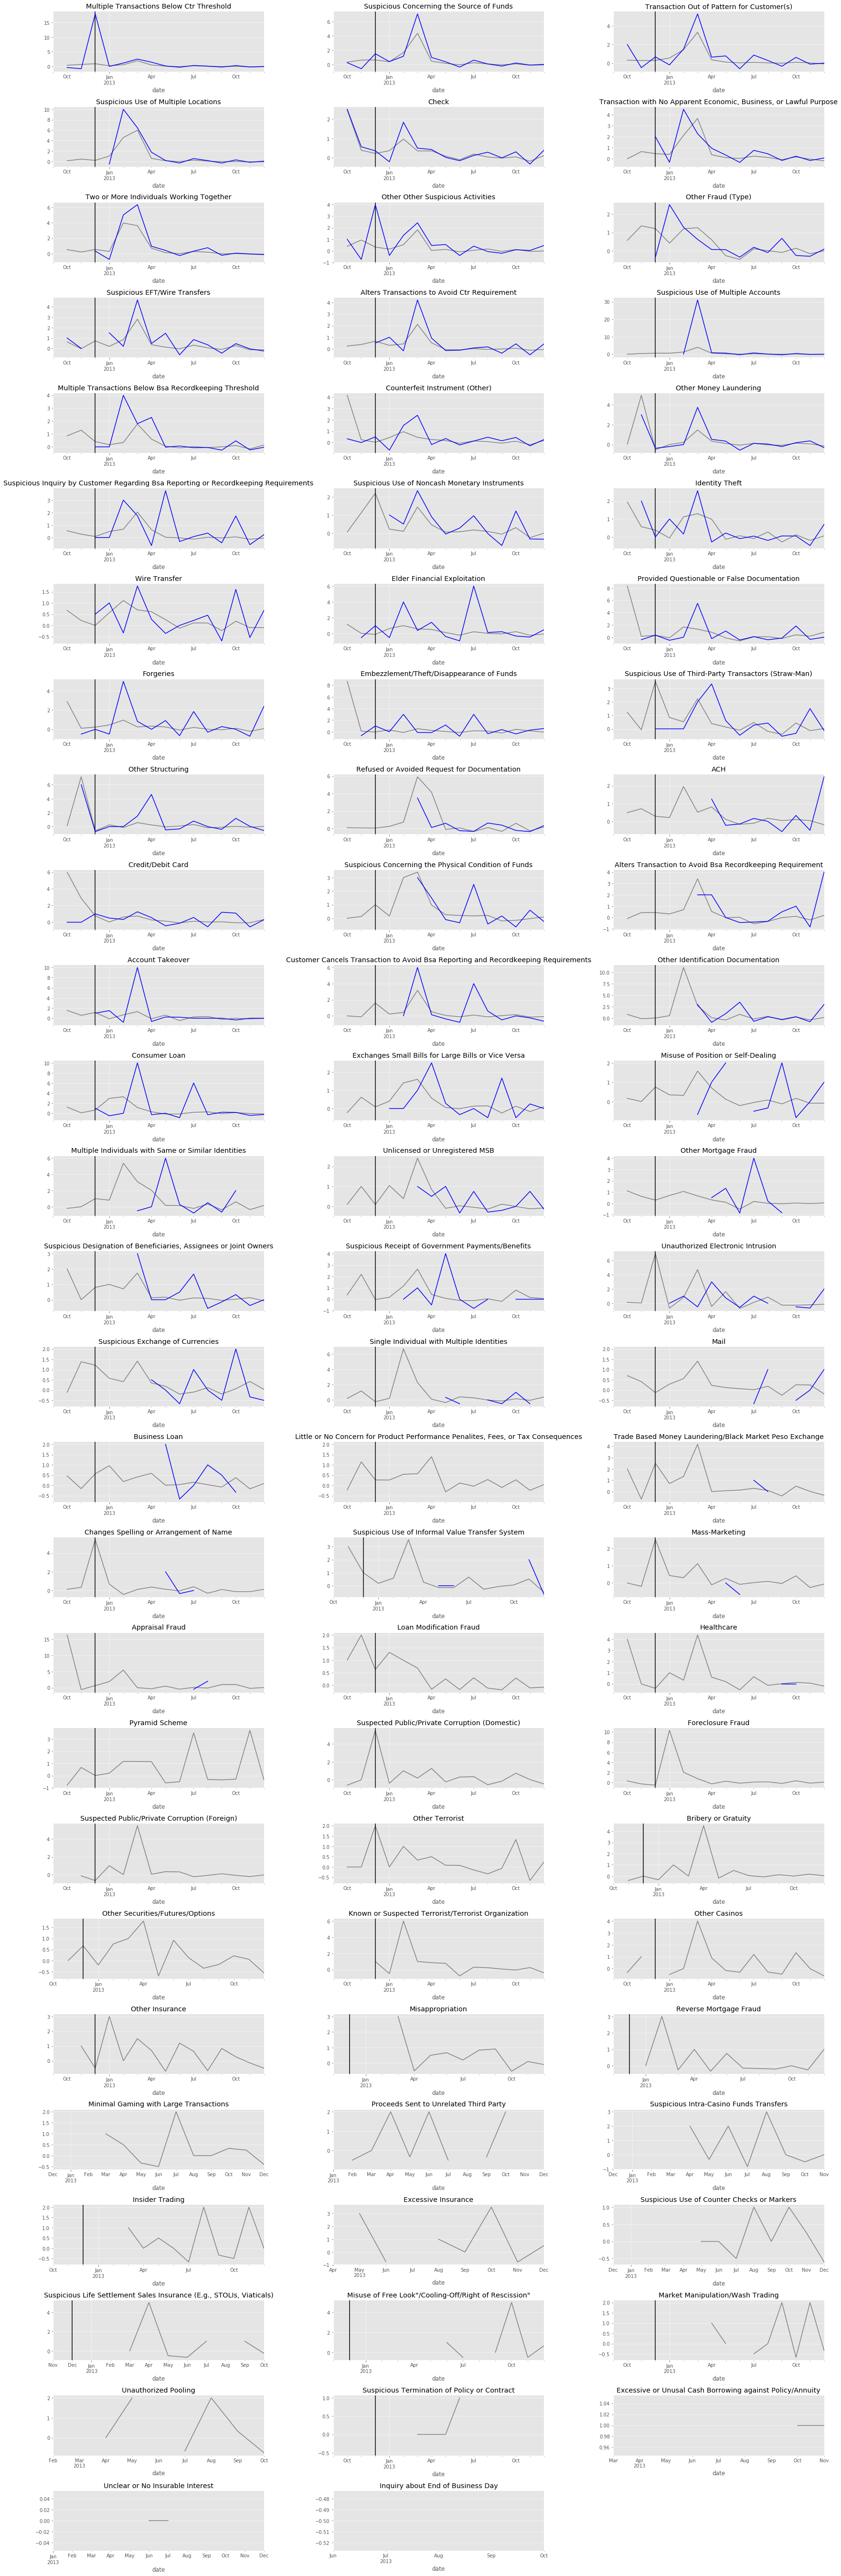

In [32]:
suspiciousplots('12/14/2012', states=['Connecticut'], months=12)

# EXAMPLE: April 13, 2013: Boston Marathon Bombing

## 6 months out

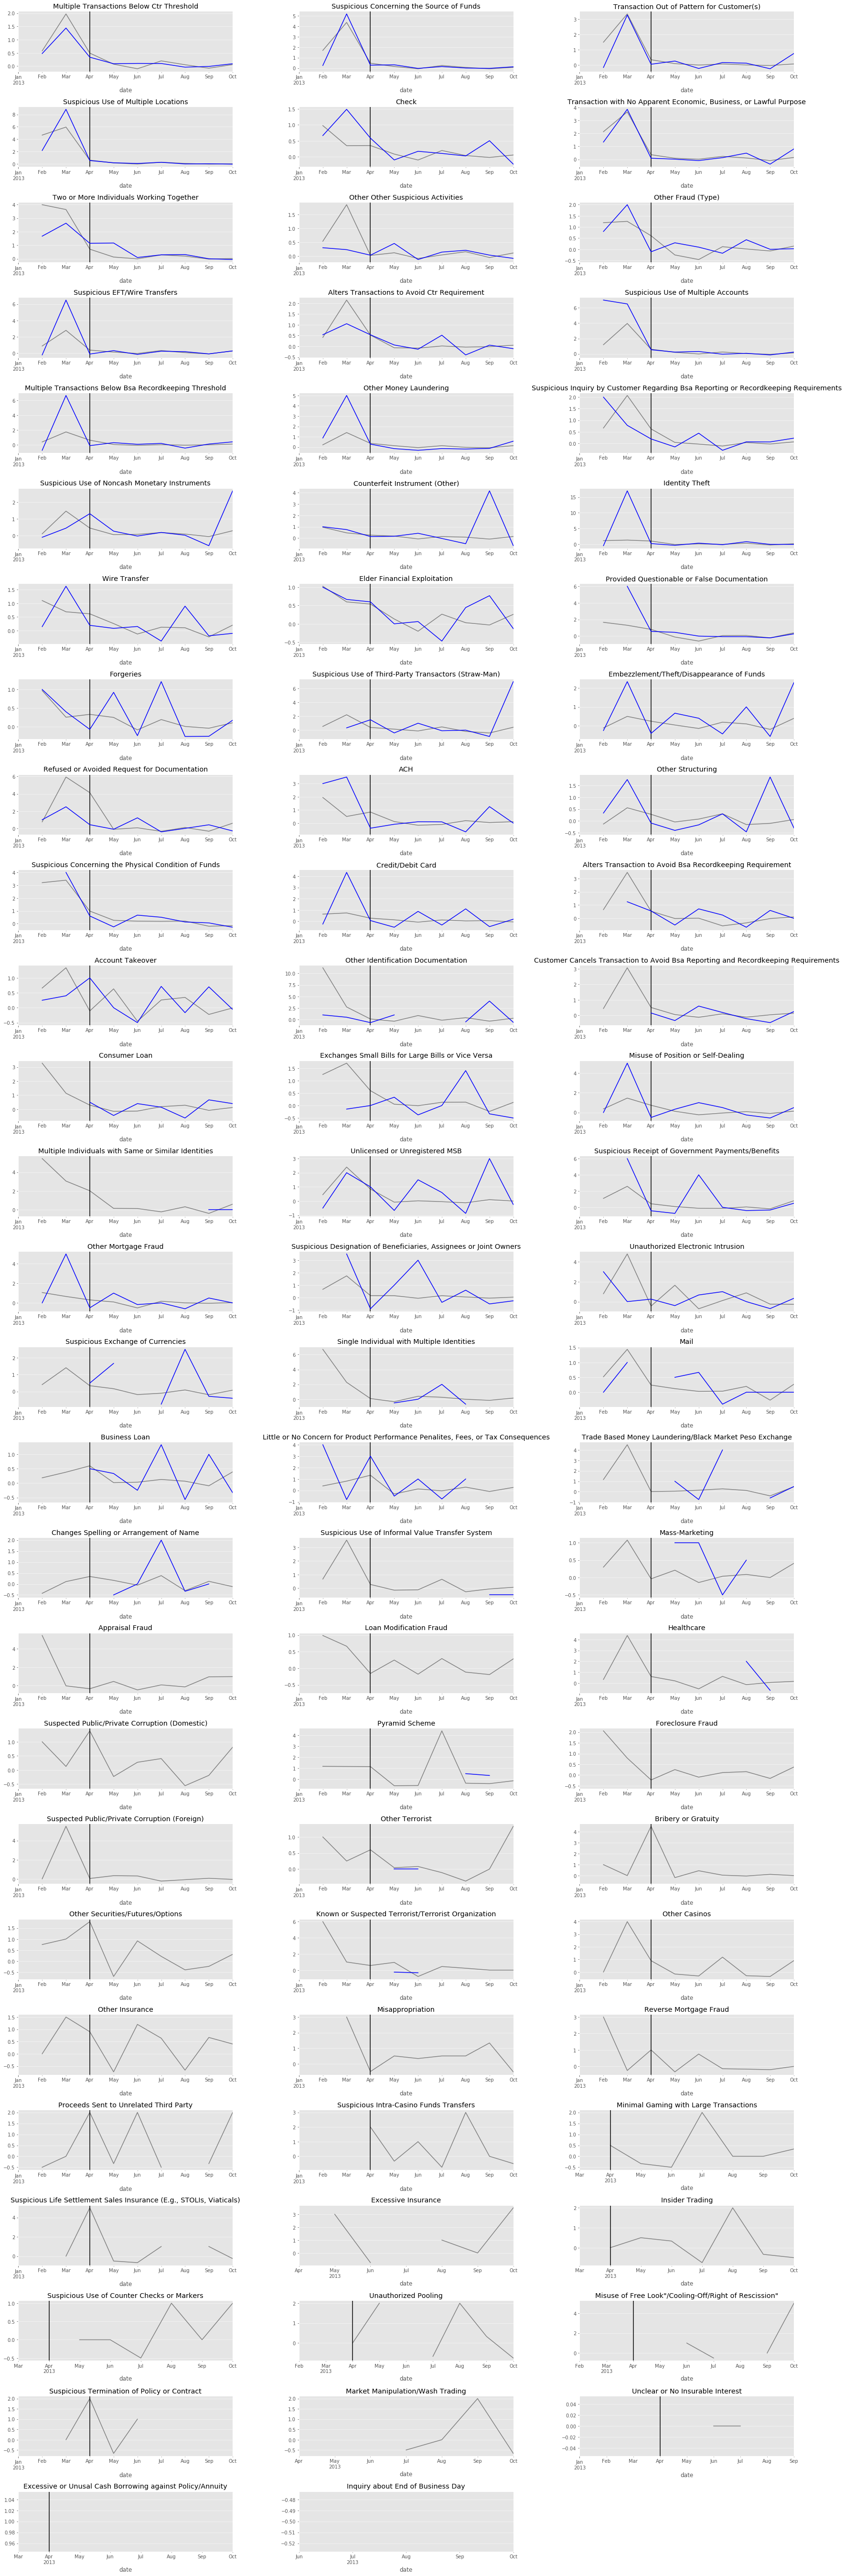

In [36]:
suspiciousplots("04/13/2013", states=['Massachusetts'])

## 12 months out

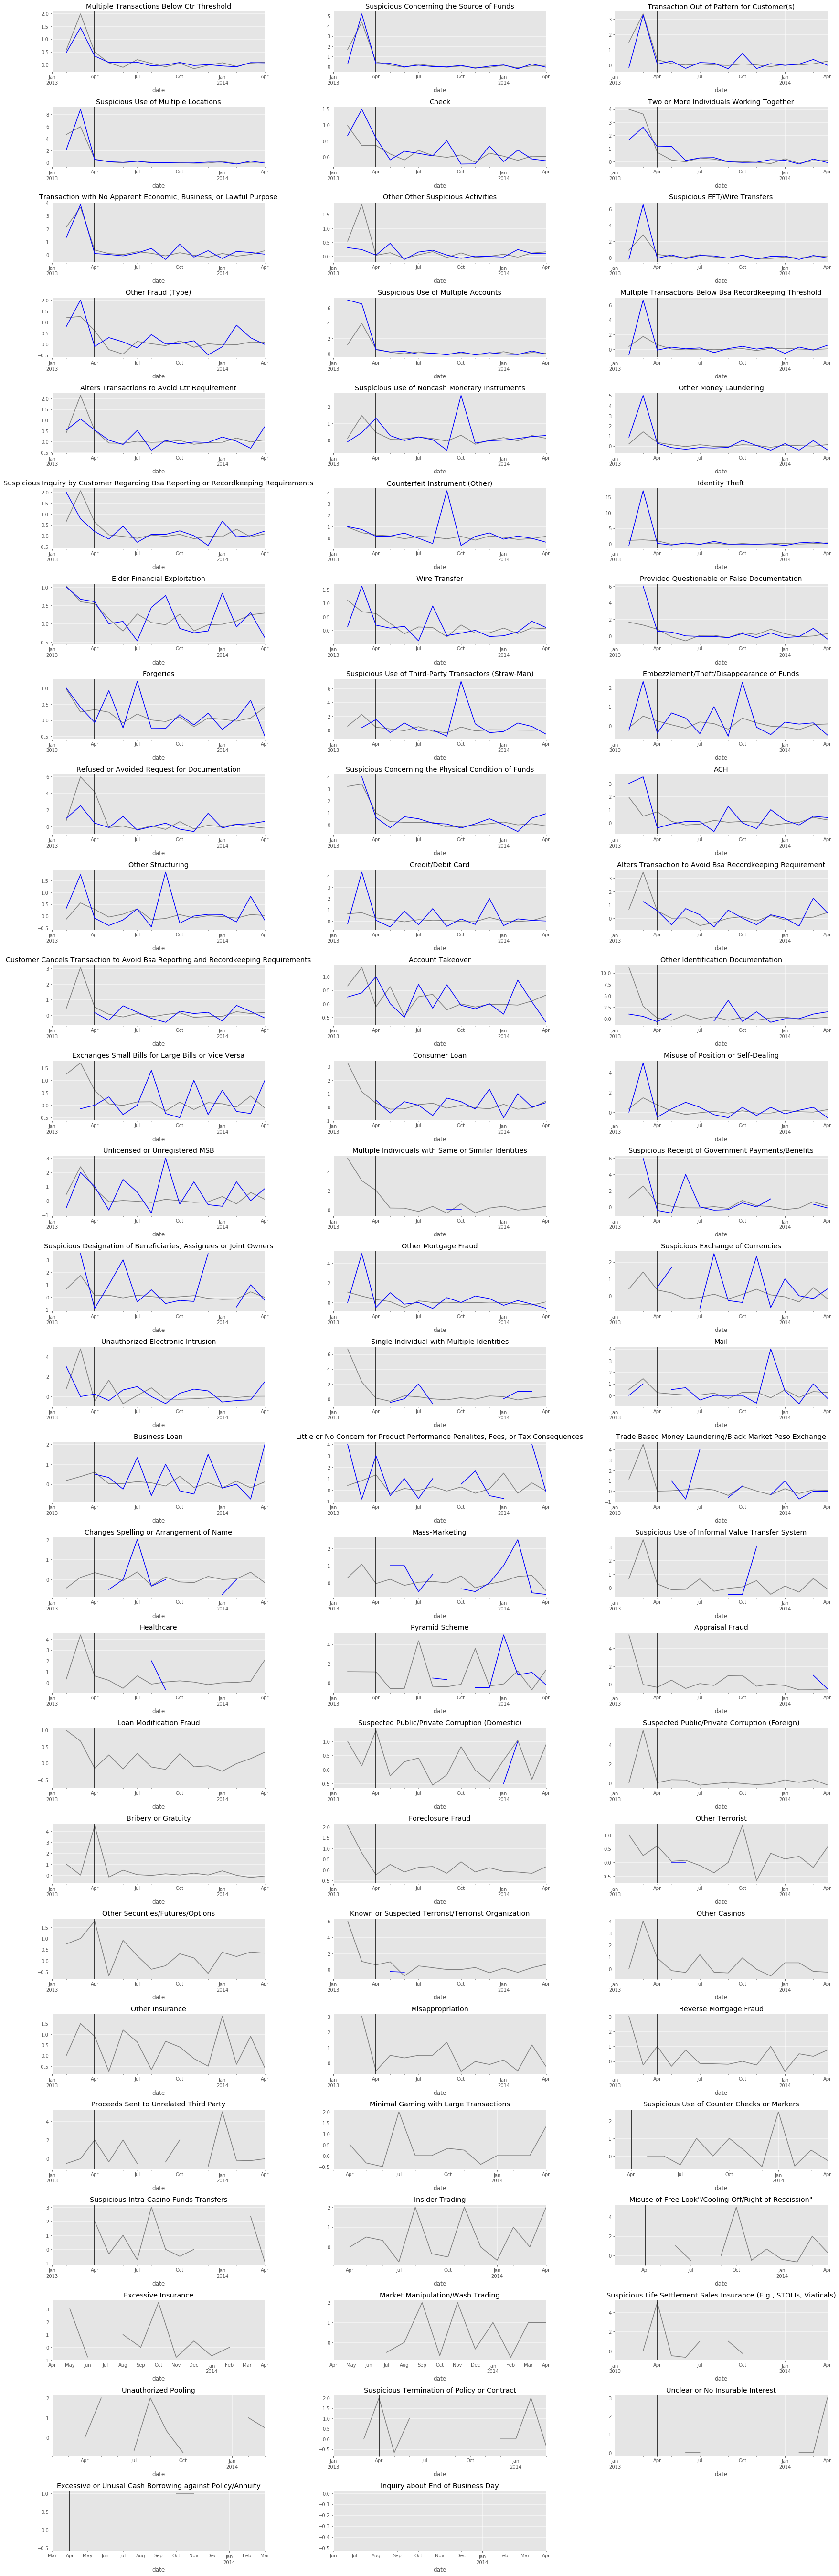

In [37]:
suspiciousplots("04/13/2013", states=['Massachusetts'], months=12)